In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
file = 'facebook_ads_data.csv'
data = pd.read_csv(file)

In [2]:
data.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


### 1. Plot with daily total spend in 2021

C:\Users\User\AppData\Local\Temp\ipykernel_17656\1916394181.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


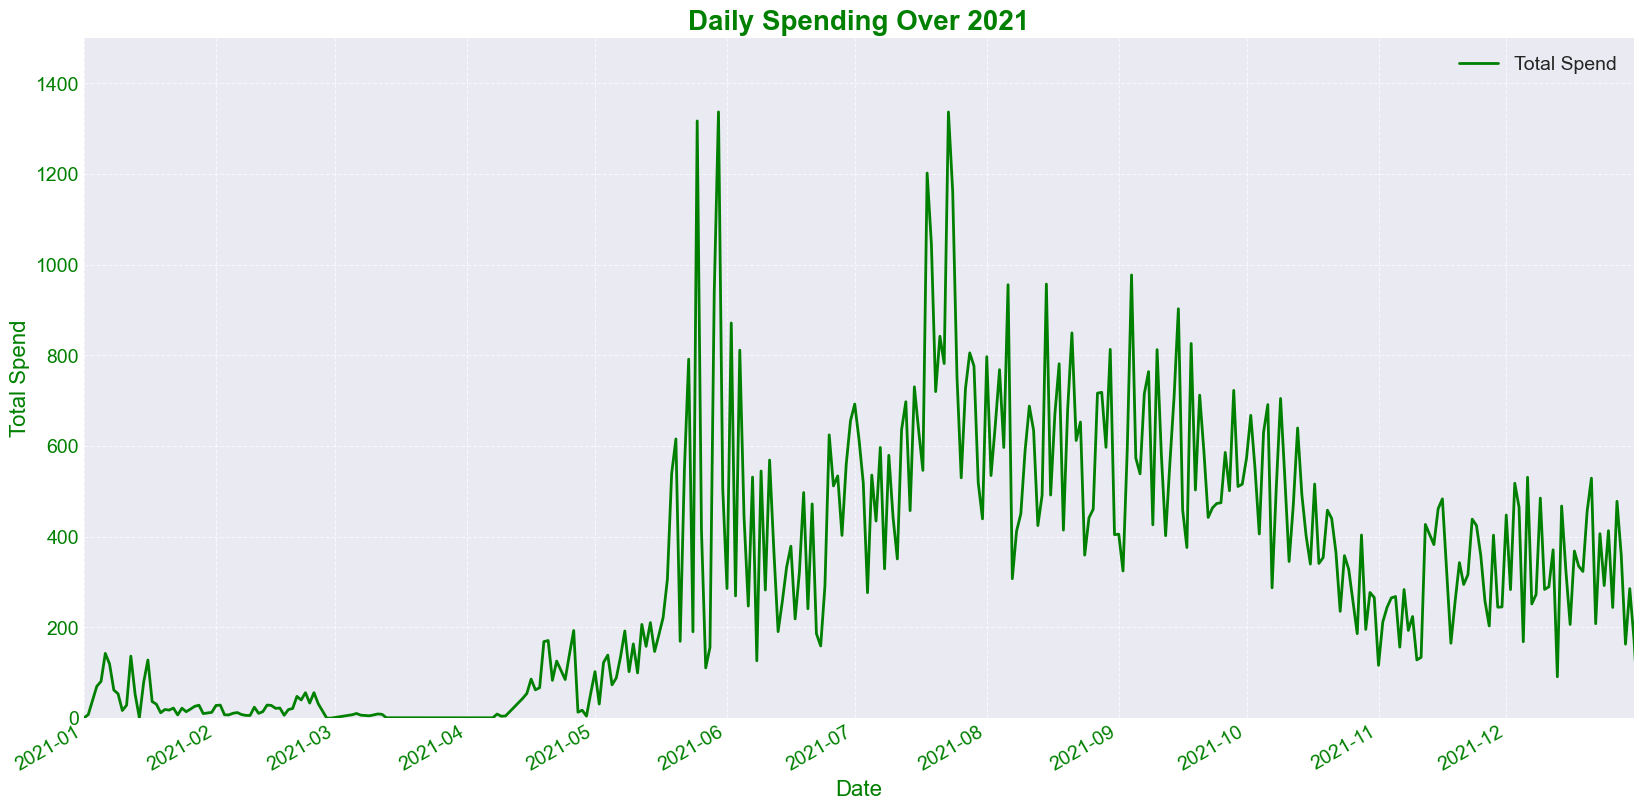

In [3]:
data['ad_date'] = pd.to_datetime(data['ad_date'])
start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2021, 12, 31)
date_grouped = data.groupby(by='ad_date')['total_spend'].sum()

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(date_grouped.index, date_grouped.values, color="green", linewidth=2, label="Total Spend")
ax.set_xlim(start_date, end_date)
ax.set_ylim(0, 1500)

ax.set_title("Daily Spending Over 2021", fontsize=20, fontweight='bold', color="green")
ax.set_xlabel("Date", fontsize=16, color="green")
ax.set_ylabel("Total Spend", fontsize=16, color="green")

ax.tick_params(axis='both', which='major', labelsize=14, colors='green')
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper right', fontsize=14)
fig.autofmt_xdate()

max_spend_date = date_grouped.idxmax()
max_spend_value = date_grouped.max()
ax.annotate(f'Peak: ${max_spend_value}', xy=(max_spend_date, max_spend_value), xytext=(max_spend_date, max_spend_value + 100),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='green')

plt.savefig('daily_spend_2021.png', dpi=300, bbox_inches='tight')
plt.show()


### 2. Plot with daily ROMI in 2021

C:\Users\User\AppData\Local\Temp\ipykernel_17656\416824581.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


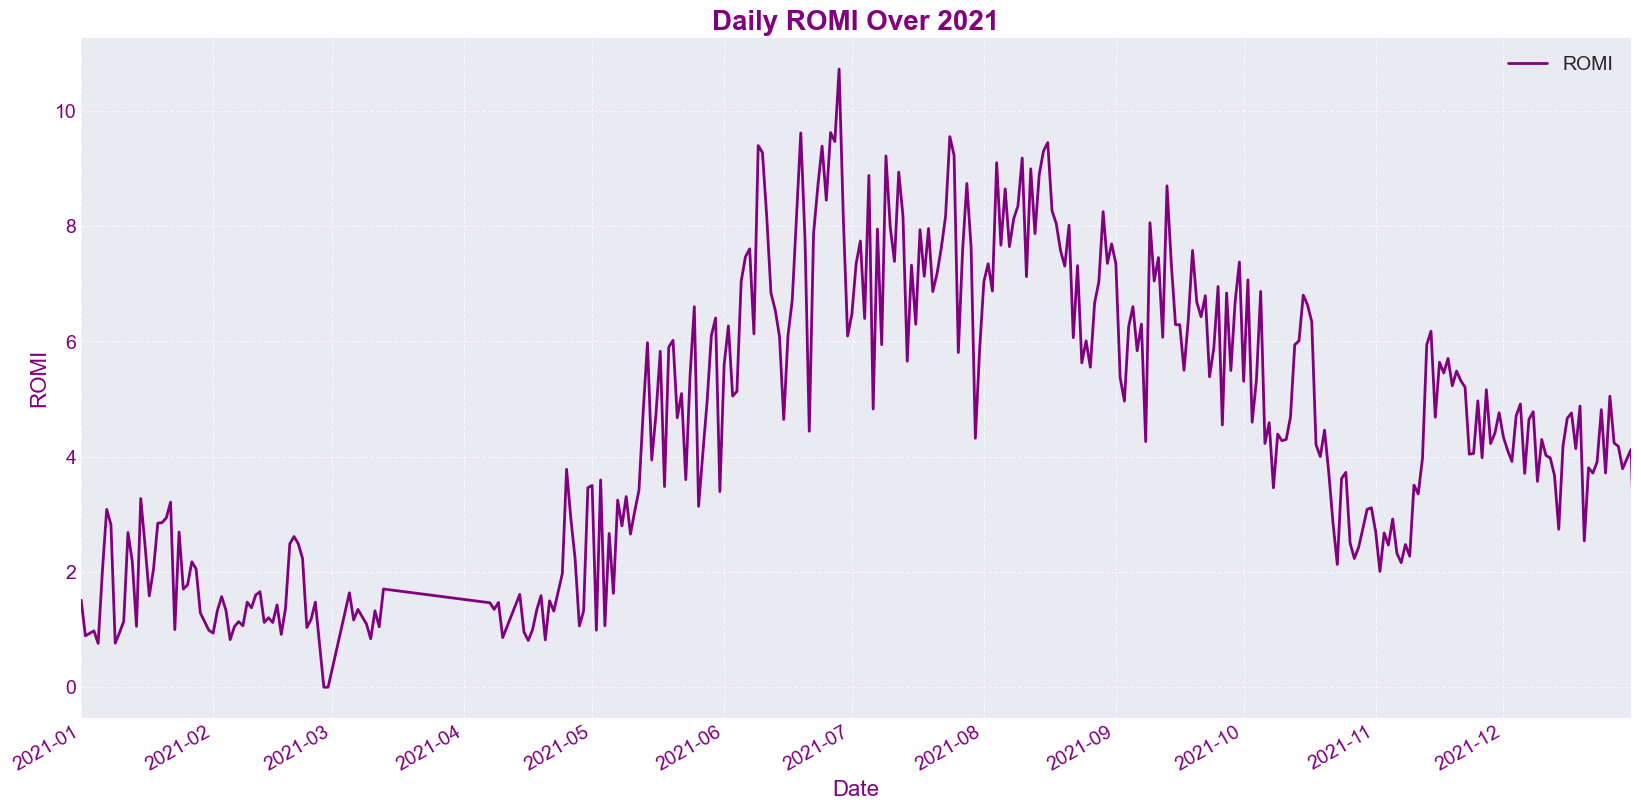

In [4]:
data['ad_date'] = pd.to_datetime(data['ad_date'])
start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2021, 12, 31)
date_grouped = data.groupby(by='ad_date')['romi'].sum()

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(date_grouped.index, date_grouped.values, color="purple", linewidth=2, label="ROMI")
ax.set_xlim(start_date, end_date)

ax.set_title("Daily ROMI Over 2021", fontsize=20, fontweight='bold', color="purple")
ax.set_xlabel("Date", fontsize=16, color="purple")
ax.set_ylabel("ROMI", fontsize=16, color="purple")

ax.tick_params(axis='both', which='major', labelsize=14, colors='purple')
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper right', fontsize=14)
fig.autofmt_xdate()

plt.savefig('daily_romi_2021.png', dpi=300, bbox_inches='tight')
plt.show()

# BONUS

### 1. Total spend by campaign name

C:\Users\User\AppData\Local\Temp\ipykernel_17656\195017096.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


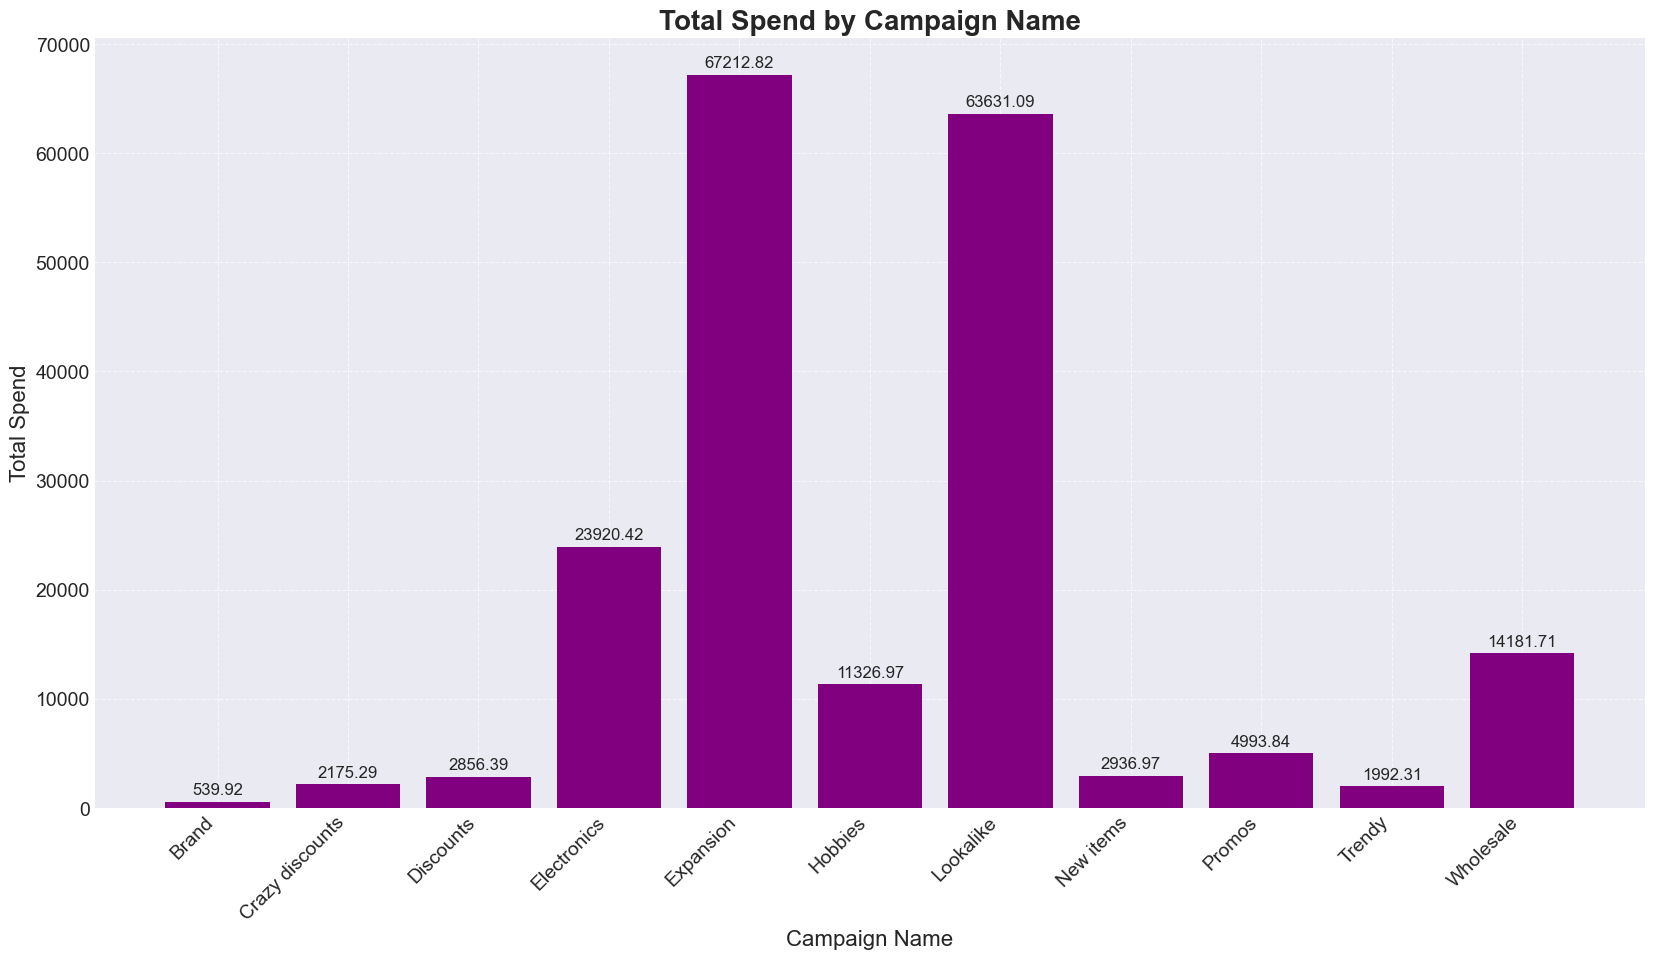

In [5]:
date_grouped = data.groupby(by='campaign_name')['total_spend'].sum().reset_index()

plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 10))
bars = ax.bar(date_grouped['campaign_name'], date_grouped['total_spend'], color='purple')

ax.set_title("Total Spend by Campaign Name", fontsize=20, fontweight='bold')
ax.set_xlabel("Campaign Name", fontsize=16)
ax.set_ylabel("Total Spend", fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45, ha='right')
ax.grid(True, linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

plt.savefig('total_spend_by_campaign.png', dpi=300, bbox_inches='tight')
plt.show()

### 2. Total ROMI by campaign name

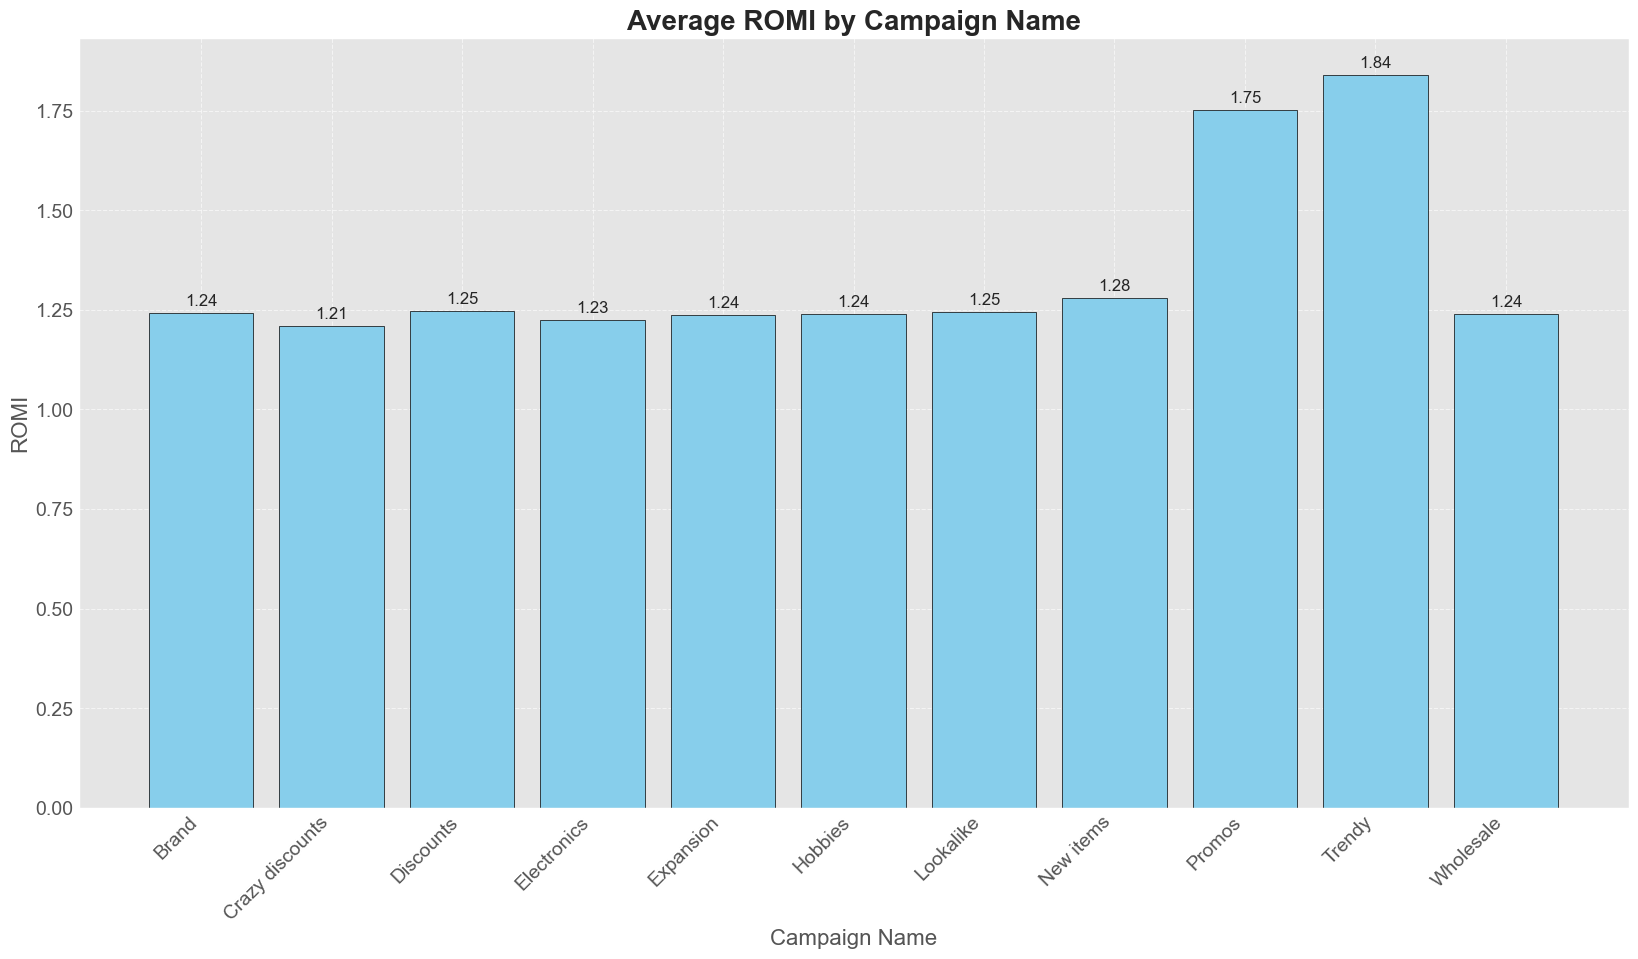

In [6]:
date_grouped = data.groupby(by='campaign_name')['romi'].mean().reset_index()

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 10))
bars = ax.bar(date_grouped['campaign_name'], date_grouped['romi'], color='skyblue', edgecolor='black')

ax.set_title("Average ROMI by Campaign Name", fontsize=20, fontweight='bold')
ax.set_xlabel("Campaign Name", fontsize=16)
ax.set_ylabel("ROMI", fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45, ha='right')
ax.grid(True, linestyle='--', alpha=0.6)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

plt.savefig('average_romi_by_campaign.png', dpi=300, bbox_inches='tight')
plt.show()

### 1. Box plot with daily ROMI grouped by campaign name

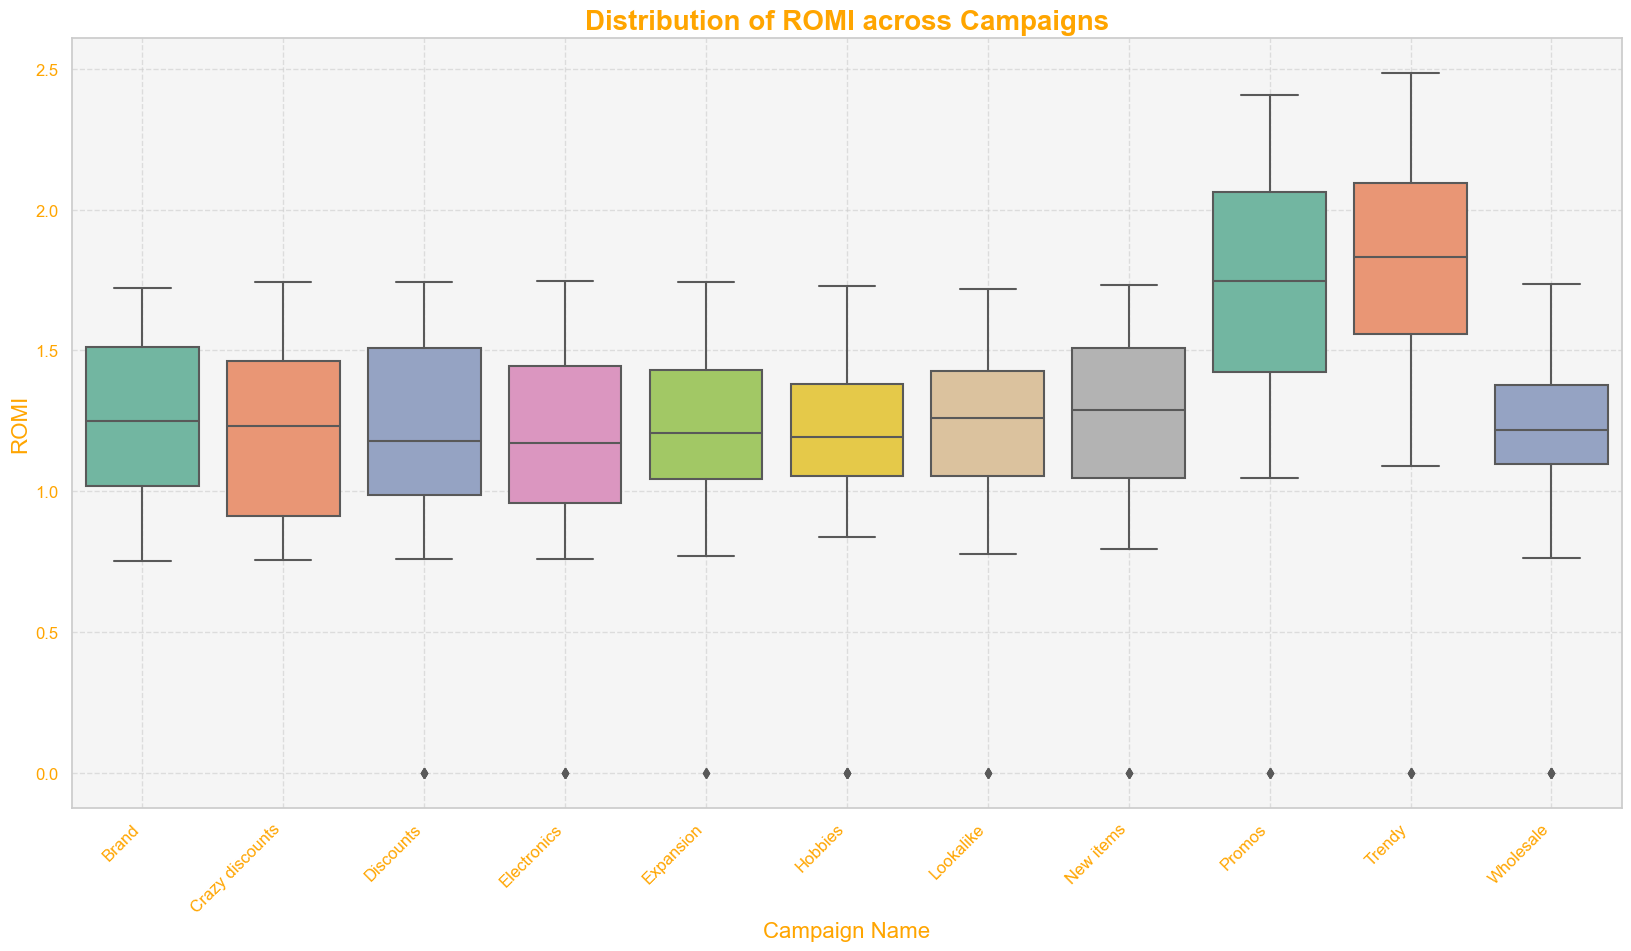

In [7]:
date_grouped = data.groupby(by=['campaign_name', 'ad_date'])['romi'].sum().reset_index()

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x="campaign_name", y="romi", data=date_grouped, ax=ax, palette="Set2")

ax.set_title("Distribution of ROMI across Campaigns", fontsize=20, fontweight='bold', color="orange")
ax.set_xlabel("Campaign Name", fontsize=16, color="orange")
ax.set_ylabel("ROMI", fontsize=16, color="orange")

plt.xticks(rotation=45, ha='right', fontsize=12, color="orange")
plt.yticks(fontsize=12, color="orange")
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_facecolor('whitesmoke')

plt.savefig('romi_distribution_by_campaign.png', dpi=300, bbox_inches='tight')
plt.show()

### 2. ROMI histogram

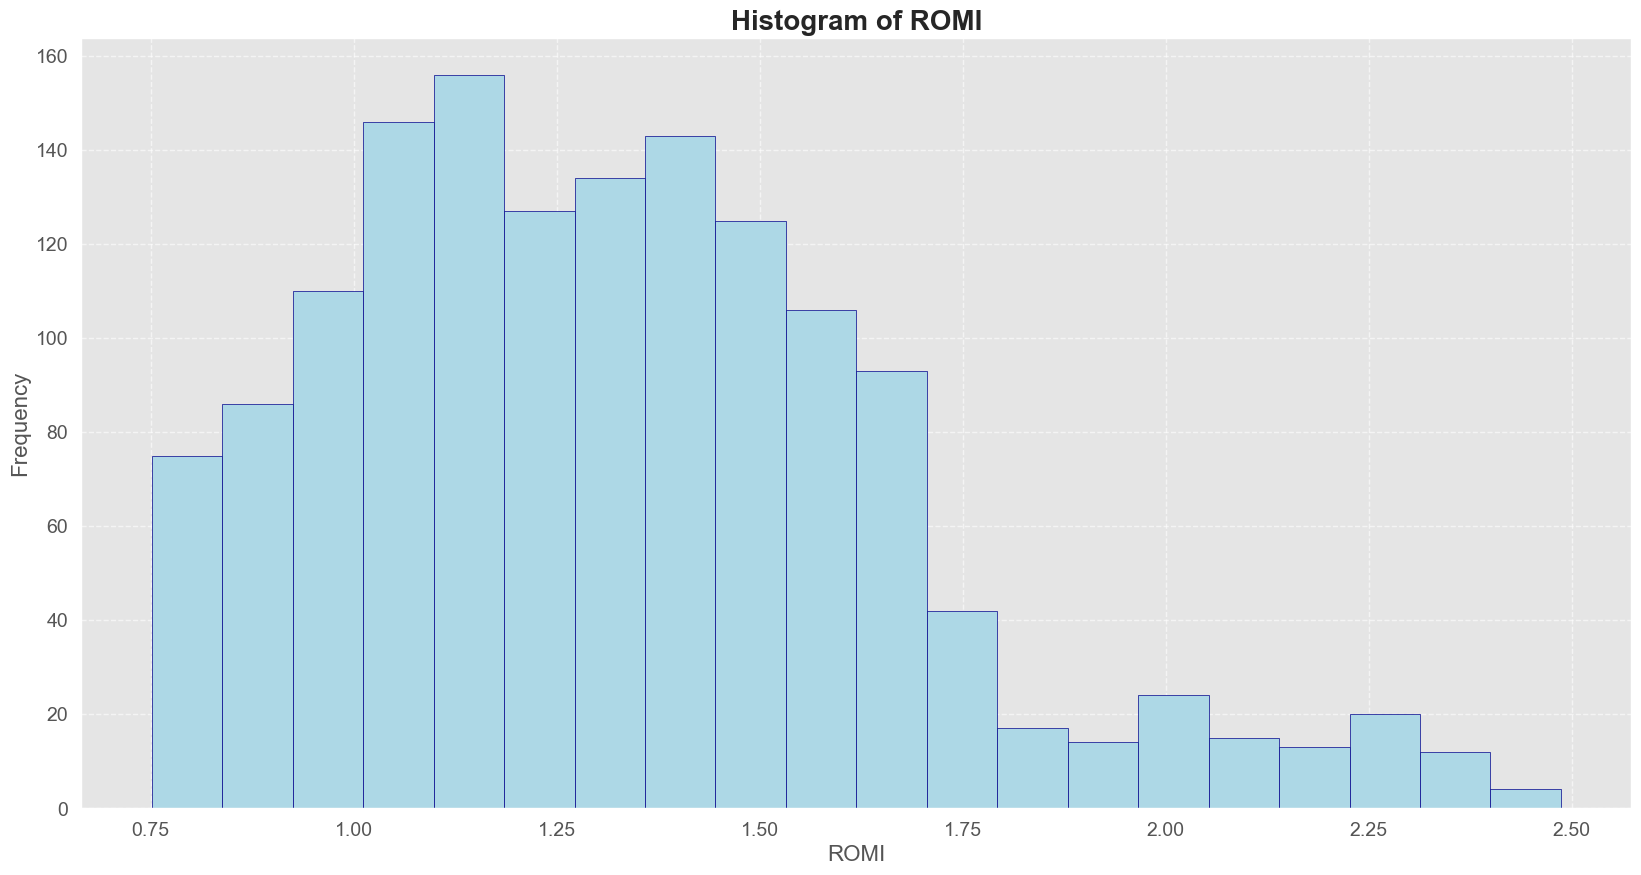

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.hist(data['romi'], bins=20, color='lightblue', edgecolor='darkblue')

plt.title("Histogram of ROMI", fontsize=20, fontweight='bold')
plt.xlabel("ROMI", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('histogram_romi.png', dpi=300, bbox_inches='tight')
plt.show()

### 3. Heatmap with corelation of all values


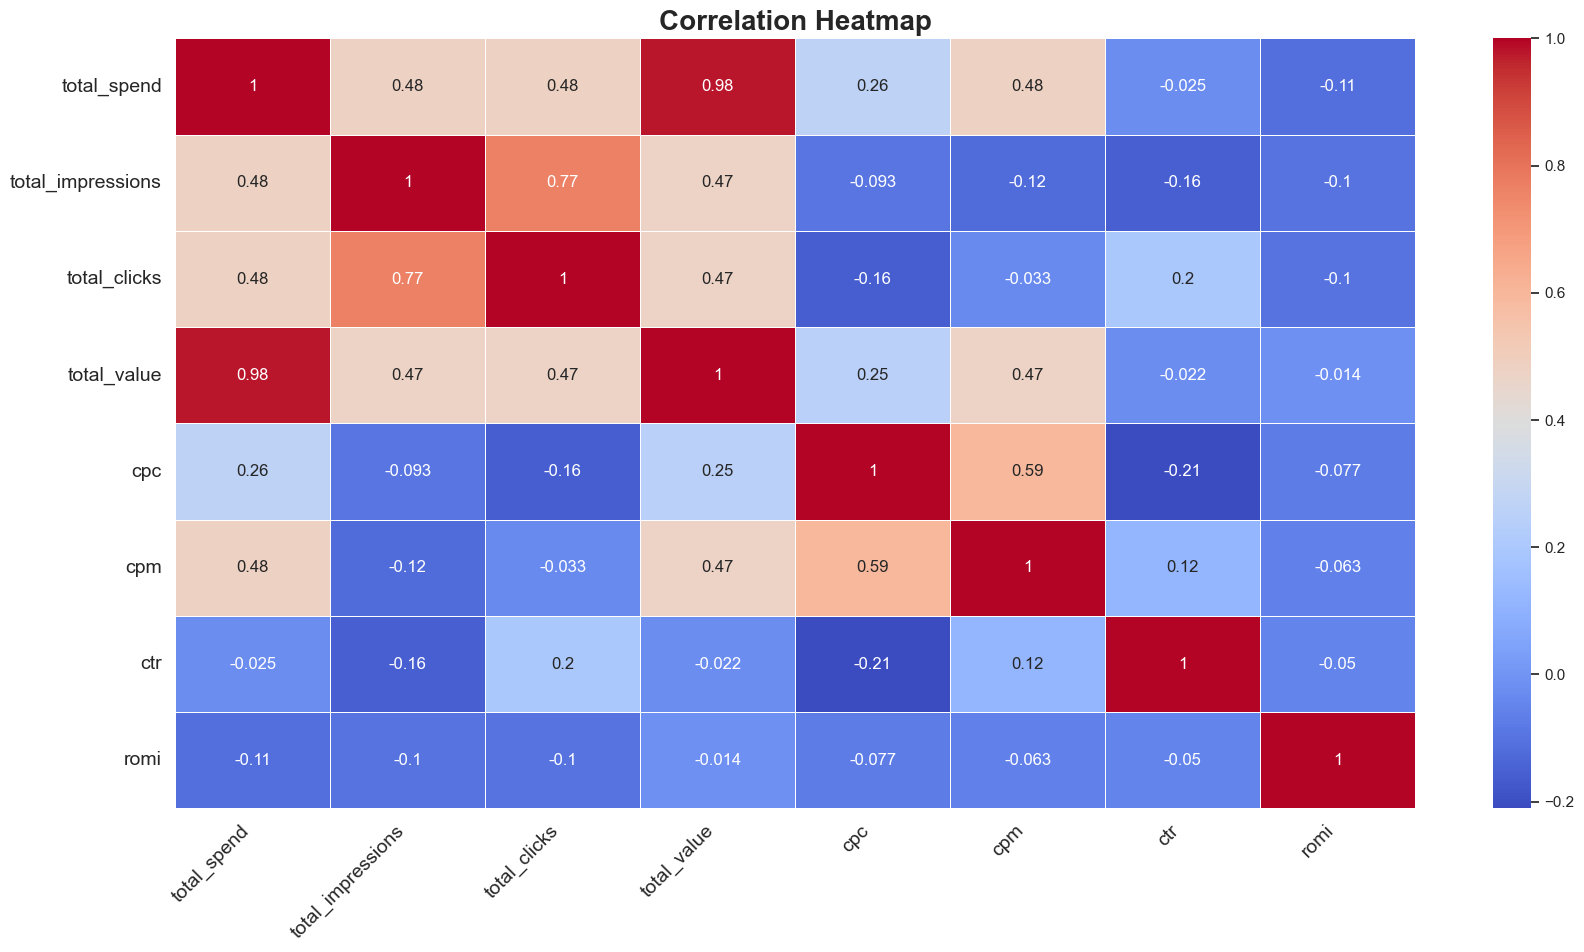

In [9]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
numeric_matrix = numeric_data.corr()

sns.set(style="white")
plt.figure(figsize=(20, 10))
sns.heatmap(numeric_matrix, annot=True, linewidths=.5, cmap='coolwarm', annot_kws={"size": 12})

plt.title('Correlation Heatmap', fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14, rotation=0)

plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Which values has the highest and lowest corelation? - Highest - total_Spend, total_impressions, total_clicks and total_value, lowest corelation - ROMI
# Total_value best corelation is  with total_spend

### 4. Linear Regression